<h1> Seattle AirBnB Open Data

<h2> by Arushi Chawla

> This data has been taken from Kaggle and it gives us a sneak peek into the Airbnb activity in Seattle. In this project, we will look through this data and identify:
- How and why does price of the house vary through out the year?
- What has been the most busiest time to visit Seattle?
- Which key features impact / drives the house price?

In [1172]:
from functools import partial# import packages and set  plot to be embedded
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from functools import partial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# To display all columns and rows
pd.options.display.max_colum- How and why does price of the house vary through out the year
- What has been the most busiest time to visit Seattle?
- Which key features impact / drives the house price?ns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)

<h2> Data Gathering

> In this section, we will be reading 3 .csv files that have been downloaded to our local machine from https://www.kaggle.com/airbnb/seattle/data#calendar.csv 

In [890]:
# Read all data files
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

In [50]:
#Look through the different data files

In [1095]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [31]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [13]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


<h2> Data Cleaning

 > Check for data anomalies including but not limiting to nulls, appropriate column data type etc.

In [1320]:
# Create copy of original dataframes
cal = calendar.copy()
#lis = listings.copy()
#rev = reviews.copy()

#### Calendar

In [1316]:
cal['listing_id'].nunique()

3818

In [1321]:
# Creating a new feature extracting month of the date to see the unique houses listed every month
cal['mon'] = pd.DatetimeIndex(cal['date']).month
cal.groupby('mon')['listing_id'].nunique()

mon
1     3818
2     3818
3     3818
4     3818
5     3818
6     3818
7     3818
8     3818
9     3818
10    3818
11    3818
12    3818
Name: listing_id, dtype: int64

In [1322]:
# Drop nulls in column price since any kind of imputation may not be best here
print(len(cal))
cal.dropna(subset=['price'], inplace=True)

#validating
print(len(cal))

1393570
934542


In [1323]:
# Fix datatypes for certain columns 
cal['date'] = pd.to_datetime(cal['date'])

In [1324]:
# Strip off '$' from price since all are dollar and we need to analyze price as a number
cal['price'] = cal['price'].str[1:]

# Replace ',' from the price and then convert it to float
cal['price'] = cal['price'].apply(lambda x: float(x.split()[0].replace(',', '')))

#### Listings

In [988]:
# Drop columns not relevant to our analyses
col = ['summary','name','space','description','experiences_offered','neighborhood_overview','notes','transit', \
       'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url',\
       'host_picture_url','street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', \
       'square_feet', 'calendar_updated','requires_license', 'weekly_price', 'monthly_price', \
       'first_review','last_review','host_name','host_location']

lis.drop(col, axis =1, inplace=True)
#lis.drop('security_deposit', axis=1, inplace=True)

In [989]:
# Rename columns
col = {'market': 'city',
       'extra_people' : 'extra_people_price'}
lis.rename(columns=col, inplace=True)

In [990]:
# Strip off '$' from all the price columns since all are dollar and we need to analyze price as a number
lis['price'] = lis['price'].str[1:]
lis['extra_people_price'] = lis['extra_people_price'].str[1:]
lis['cleaning_fee'] = lis['cleaning_fee'].str[1:]

# Replace NaN with 0 for cleaning_fee
lis['cleaning_fee'] = lis['cleaning_fee'].fillna('0')

# Replace ',' from the price and then convert it to float
lis['price'] = lis['price'].apply(lambda x: float(x.split()[0].replace(',', '')))
lis['extra_people_price'] = lis['extra_people_price'].apply(lambda x: float(x.split()[0].replace(',', '')))
lis['cleaning_fee'] = lis['cleaning_fee'].astype(float)

In [991]:
# Create new features
lis['security_deposit_Y/N'] = np.where(lis.security_deposit.isnull(), 0, 1)
lis[['security_deposit_Y/N','security_deposit']]

#Drop original column security_deposit
lis.drop('security_deposit', axis=1, inplace=True)

In [992]:
# Remove % from 'host_response_rate', and 'host_acceptance_rate'
lis['host_response_rate'] = lis['host_response_rate'].str[:-1]
lis['host_acceptance_rate'] = lis['host_acceptance_rate'].str[:-1]

# Replace NaN with 0 (assuming these hosts didn't get rating)
lis['host_response_rate'] = lis['host_response_rate'].fillna('0')
lis['host_acceptance_rate'] = lis['host_acceptance_rate'].fillna('0')

# Convert data type
lis['host_response_rate'].astype(int)
lis['host_acceptance_rate'].astype(int)

0       100
1       100
2       100
3       0  
4       0  
5       0  
6       100
7       100
8       100
9       100
10      100
11      100
12      100
13      100
14      100
15      100
16      100
17      100
18      0  
19      0  
20      100
21      100
22      100
23      0  
24      0  
25      100
26      100
27      100
28      100
29      100
30      100
31      100
32      100
33      100
34      100
35      100
36      0  
37      100
38      100
39      100
40      100
41      100
42      0  
43      100
44      100
45      100
46      100
47      100
48      0  
49      100
50      100
51      100
52      0  
53      0  
54      100
55      100
56      100
57      100
58      0  
59      100
60      0  
61      100
62      100
63      100
64      100
65      100
66      100
67      100
68      100
69      0  
70      0  
71      100
72      100
73      100
74      100
75      100
76      100
77      100
78      100
79      100
80      100
81      100
82      100
83  

In [993]:
# Create new features: 'Number of years host has been active for'
lis['host_since'] = pd.to_datetime(lis['host_since'])
lis['host_active_years'] = round((pd.datetime.now() - lis['host_since']).dt.days / 365,1)
lis.drop('host_since', axis=1, inplace=True)

In [994]:
# Count number of amenities provided
lis['num_of_amenities'] = lis['amenities'].apply(lambda col: col.count(',')+1)

# Count number of verifications
lis['num_of_verifications'] = lis['host_verifications'].apply(lambda col: col.count(',')+1)

In [996]:
# Handle misisng values in numeric columns        
num_col = lis.select_dtypes(include=['float', 'int']).copy().columns

for col in num_col:
    #lis[col].fillna(0, inplace=True)
    lis.update(lis[col].fillna(0))

In [997]:
# Converting binary t/f to 1/0
binary_mapping = {'f': 0, 't': 1}
cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability', \
'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
lis[cols] = lis[cols].apply(lambda x: x.map(binary_mapping))

In [998]:
# Handle misisng values in categorical columns     
lis.update(lis['zipcode'].fillna('99999'))

In [999]:
# Check zipcode length and fix is required
lis.update(lis[lis['zipcode'].str.len()>5]['zipcode'].str[3:])

In [1000]:
# Check on the 2 records with no profile pic
lis[lis.host_has_profile_pic.isna()]

# Most of the scores / reviews for these 2 hosts is 0 or not available. Furthermoew these hosts have also 
# not been verified. So we should delete these records from the dataframe
lis.dropna(subset=['host_has_profile_pic'], inplace=True)

In [1001]:
# Create dummy variable for a few categorical columns
cat_cols = ['host_response_time', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
for col in cat_cols:
    lis = pd.concat([lis,
                     pd.get_dummies(lis[col], prefix=col, prefix_sep='_', drop_first=True)],
                    axis=1)

#### Reviews

In [153]:
# Drop null review since that is the key column in this table and can't be imputed; also null values are only a few 
rev.dropna(subset=['comments'], inplace=True)

In [154]:
# Fix datatypes for certain columns 
rev['date'] = pd.to_datetime(rev['date'])

In [ ]:
# Creating a new feature extracting Month of the date
rev['mon'] = pd.DatetimeIndex(rev['date']).month

<h2> Data Validation

In [1325]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 5 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null object
price         934542 non-null float64
mon           934542 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 42.8+ MB


In [128]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [1002]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Data columns (total 91 columns):
id                                       3816 non-null int64
listing_url                              3816 non-null object
scrape_id                                3816 non-null int64
last_scraped                             3816 non-null object
host_id                                  3816 non-null int64
host_response_time                       3295 non-null object
host_response_rate                       3816 non-null object
host_acceptance_rate                     3816 non-null object
host_is_superhost                        3816 non-null float64
host_neighbourhood                       3518 non-null object
host_listings_count                      3816 non-null float64
host_total_listings_count                3816 non-null float64
host_verifications                       3816 non-null object
host_has_profile_pic                     3816 non-null float64
host_identity_verified  

In [1003]:
lis.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,city,state,zipcode,city,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people_price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,security_deposit_Y/N,host_active_years,num_of_amenities,num_of_verifications,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,956883,within a few hours,96,100,0.0,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",85.0,0.0,2,5.0,1,365,1,14,41,71,346,2016-01-04,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0.0,WASHINGTON,0,moderate,0,0,2,4.07,0,8.5,10,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,5177328,within an hour,98,100,1.0,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",1.0,1.0,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",150.0,40.0,1,0.0,2,90,1,13,13,16,291,2016-01-04,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,WASHINGTON,0,strict,1,1,6,1.48,1,7.0,16,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,16708587,within a few hours,67,100,0.0,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1.0,1.0,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",975.0,300.0,10,25.0,4,30,1,1,6,17,220,2016-01-04,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,WASHINGTON,0,strict,0,0,2,1.15,1,5.7,21,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,9851441,NaN,0,0,0.0,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook'

In [1004]:
lis.describe()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people_price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,security_deposit_Y/N,host_active_years,num_of_amenities,num_of_verifications,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
count,3.816000e+03,3.816000e+03,3.816000e+03,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.0,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.0,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,5.548149e+06,2.016010e+13,1.578241e+07,0.203878,7.157757,7.157757,0.998166,0.785377,47.628967,-122.333096,0.893606,3.350105,1.254324,1.306080,1.735325,127.951782,45.079927,1.672956,10.666667,2.369759,780.558438,1.0,16.786426,36.817610,58.088836,244.876834,22.235063,78.559748,7.979822,7.926101,8.104298,8.141247,7.964623,7.832285,0.0,0.154874,0.084119,0.098270,2.947327,1.738425,0.488994,6.382940,14.368449,4.670860,0.156447,0.253669,0.443396,0.009696,0.002096,0.003407,0.005503,0.003407,0.000524,0.023847,0.000524,0.454140,0.010482,0.005765,0.001310,0.030922,0.000786,0.000262,0.303983,0.030660,0.003407,0.019392,0.012317,0.957809,0.327568,0.371331
std,2.962118e+06,0.000000e+00,1.457927e+07,0.402932,28.628149,28.628149,0.042796,0.410614,0.043062,0.031751,0.308382,1.977876,0.594851,0.884184,1.139851,90.250833,49.920489,1.311293,17.588153,16.310159,1683.975176,0.0,12.172902,23.334218,34.057422,126.720185,37.737349,35.943535,3.691350,3.667760,3.732556,3.722091,3.664366,3.627356,0.0,0.361832,0.277603,0.297719,5.894405,1.835475,0.499944,1.559509,4.705981,1.165313,0.363326,0.435167,0.496851,0.098003,0.045745,0.058275,0.073988,0.058275,0.022890,0.152592,0.022890,0.497958,0.101858,0.075720,0.036179,0.173130,0.028031,0.016188,0.460036,0.172418,0.058275,0.137917,0.110309,0.201051,0.469388,0.483224
min,3.335000e+03,2.016010e+13,4.193000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,47.505088,-122.417219,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [411]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 7 columns):
listing_id       84831 non-null int64
id               84831 non-null int64
date             84831 non-null datetime64[ns]
reviewer_id      84831 non-null int64
reviewer_name    84831 non-null object
comments         84831 non-null object
mon              84831 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.2+ MB


In [161]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


<h2> Data Exploration

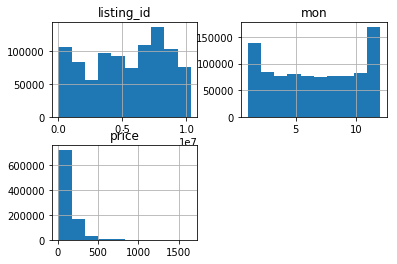

In [1326]:
cal.hist();

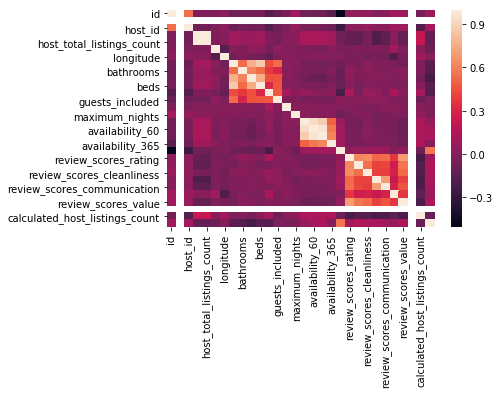

In [1005]:
sns.heatmap(listings.corr());

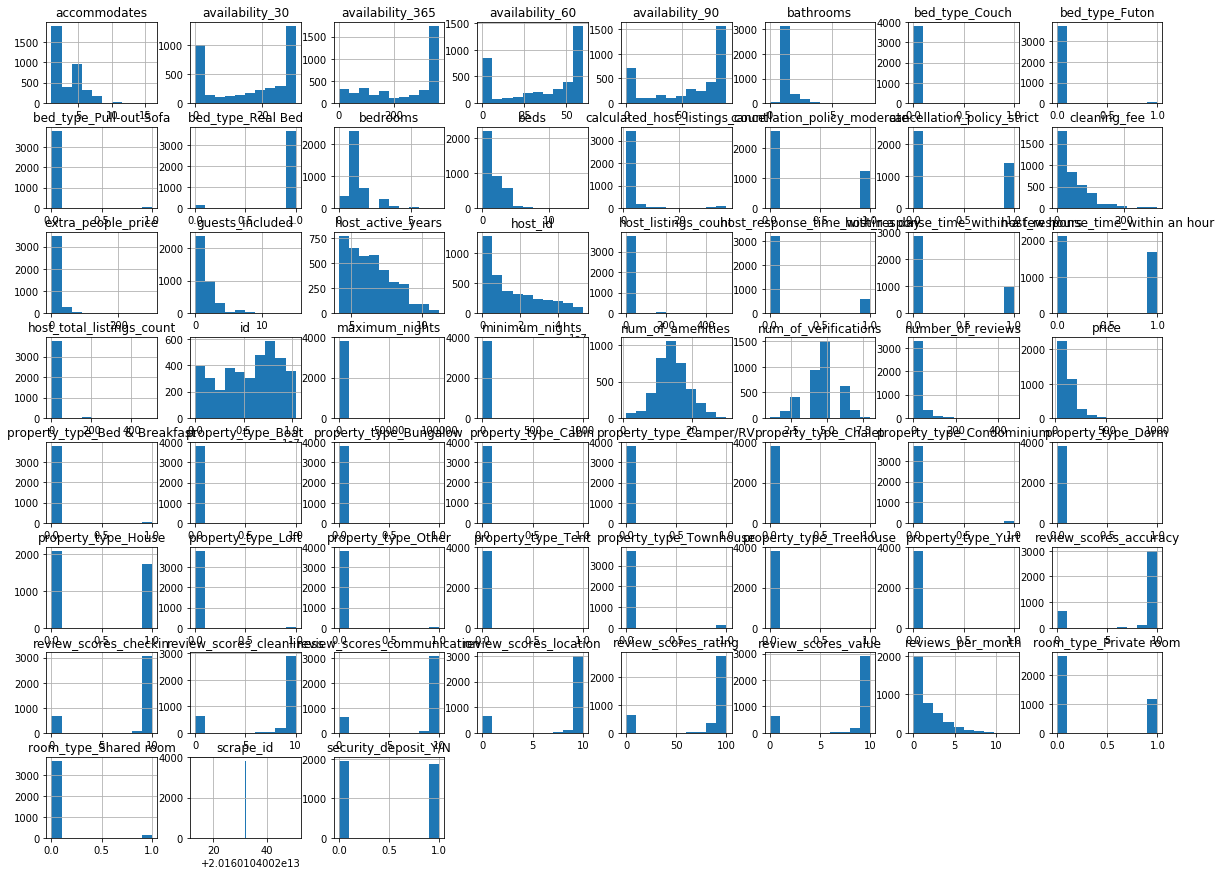

In [658]:
lis.hist(figsize = (20,15));

## Analyses

> Findings answers to the business questions identified

#### 1. How and why does price of the house vary through out the year

In [1327]:
cal.head()

,listing_id,date,available,price,mon
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1


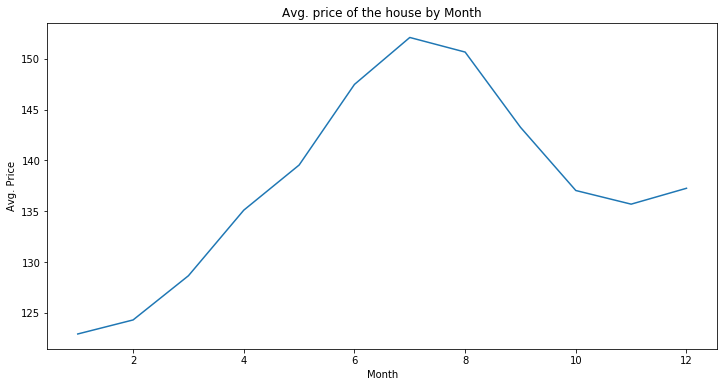

In [1328]:
mon_avg_price = cal.groupby('mon')['price'].mean()

plt.figure(figsize=[12,6]);
plt.plot(mon_avg_price.index, mon_avg_price);
plt.xlabel('Month');
plt.ylabel('Avg. Price');
plt.title('Avg. price of the house by Month');

#### July and August seems be the 2 most expensive months to Airbnb in Seattle and cheapest months being Nov - Apr. 
#### Our hypothesis is these months could be expensive because:
- Of the number of houses available in these month?
- Weather in Seattle?
- Holiday season?
#### Let's try to understand from the data what drives this increase and drop in the house price.

#### 2. What has been the most busiest time to visit Seattle?

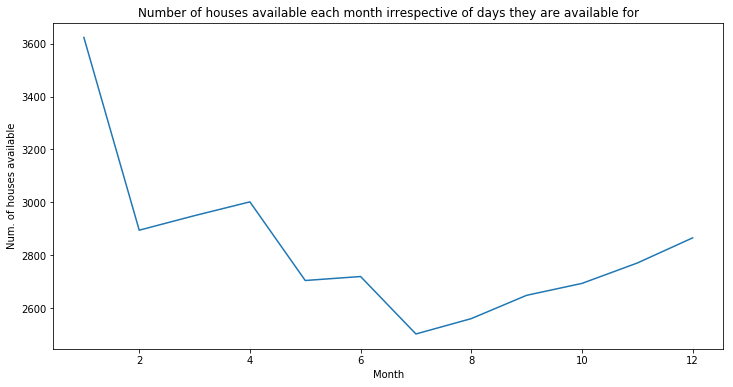

In [1330]:
# Unique count of the houses listed in a month
mon_avail = cal.groupby('mon')['listing_id'].nunique()

# Plot the number of unique houses for every month
plt.figure(figsize=[12,6]);
plt.plot(mon_avail.index, mon_avail);
plt.xlabel('Month');
plt.ylabel('Num. of houses available');
plt.title('Number of houses available each month irrespective of days they are available for');

#### This aligns with our initial assumptions. From a total of 3818 house those were listed on Airbnb, 3600 houses are available in Jan for at least a day. We also notice that July and August has the minimum number of houses ~2500 available for at least a day. 
#### As a next step, we should look at how many houses from these were available for more than 10 days in a month

In [1386]:
# Count the number of days a house is available in a month
mon_lis_avail = cal.groupby(['mon','listing_id'],as_index=False)['date'].count().\
    sort_values(by= 'mon', ascending=False)
mon_lis_avail = mon_lis_avail.rename(columns={"date":"count"})

mon_lis_avail.head()

In [1431]:
# Filter for houses that have been available for over 10 days in a month
mon_lis_avail_over10 = mon_lis_avail[mon_lis_avail['count']>10]

In [1435]:
# Count the number of houses in a month that were available for over 10 days
mon_lis_avail_over10_count = mon_lis_avail_over10.groupby('mon')['listing_id'].count()
#mon_lis_avail_over10_count.head()

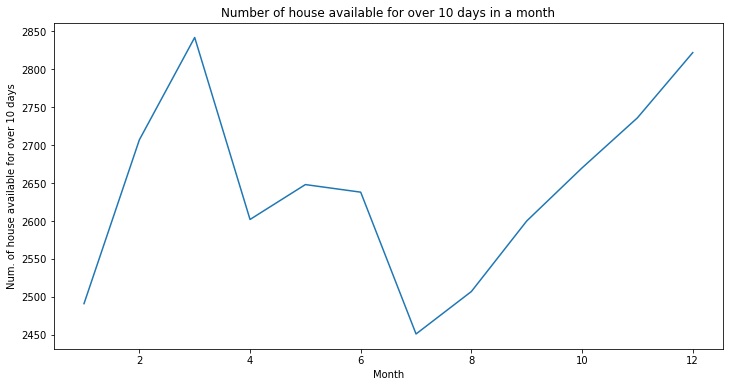

In [1436]:
# Plot the number of houses that were available for over 10 days in a month
plt.figure(figsize=[12,6]);
plt.plot(mon_lis_avail_over10_count.index, mon_lis_avail_over10_count);
plt.xlabel('Month');
plt.ylabel('Num. of house available for over 10 days');
plt.title('Number of house available for over 10 days in a month');

#### We see that March, and December to be the months with hightest number of houses available for over 10 days. If we relate the last two graphs, it looks like all the ~2800 houses that were available in Dec were available for more than 10 days and a lot of those  were available even the entire month.
#### This would have driven people to drop house prices significantly in the following month which would have resulted in lesser houses being available for over 10 days in Jan. If you compare this with what we saw in the previous graph, we can conclude that although the overall number of house availabile (~3600) was highest in Jan, ~1000 houses (~30% of total available houses in Jan) were occupied for more than 20 days. This also explains why we see minimum average monthly price in Jan which could have been a promotional offer or discounted price by the hosts to drive more people. A similar pattern is also seen in July and August. The high demand of houses in July and August explains their high prices which starts to decline after August and Sepetember since the houses are less in demand starting mid-September.

#### In general, Seattlt has the best weather from July to mid-September, driving more tourists to the city and October - February being the most chilly and wet weather not suitable for any outdoor events and festivals. 

#### Our hypothesis is further supported by the fact that July - August has significantly hightest number of reviews on Airbnb which also directonaly tell us about more people doing Airbnb in these months.

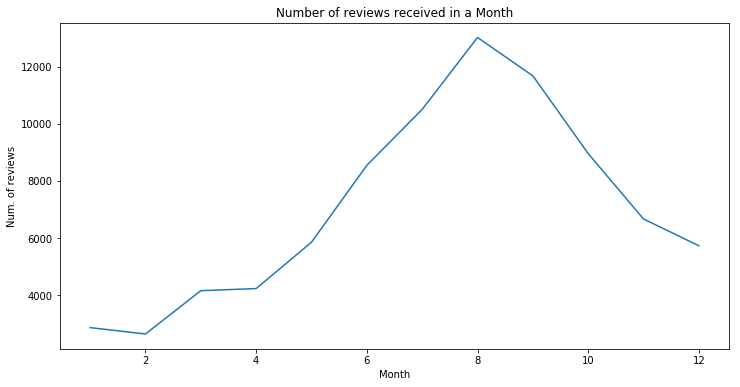

In [1437]:
# Count the number of reviews in a month
mon_reviews = rev.groupby('mon')['reviewer_id'].count()

# Plot the number of reviews a host has received in a month
plt.figure(figsize=[12,6]);
plt.plot(mon_reviews.index, mon_reviews);
plt.xlabel('Month');
plt.ylabel('Num. of reviews');
plt.title('Number of reviews received in a Month');

#### Lastly, the correlaton between availability of the house and average monthly price is -0.8 and +0.9 between reviews and the monthly price. Both the numbers support our hypothesis above and helps concluding how price is impacted by availability / demand and which time of the year seems to be most expensive. 

In [1438]:
mon_avail.corr(mon_avg_price) , mon_reviews.corr(mon_avg_price) 

(-0.7984832216128627, 0.8835720033017807)

#### 3. Which key features impact / drives the house price?

#### Starting with Univariate analyses

##### Which property types are most expensive?

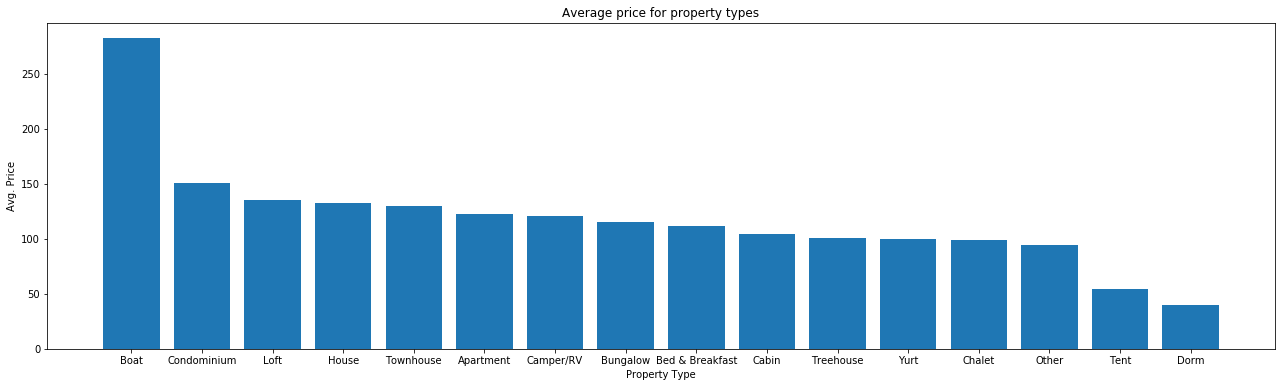

In [1439]:
# Check the average price for all property types
prop_price = lis.groupby('property_type')['price'].mean().sort_values(ascending = False)

# Plot the average price for all propert types
plt.figure(figsize=[22,6]);
plt.bar(prop_price.index, prop_price);
plt.xlabel('Property Type');
plt.ylabel('Avg. Price');
plt.title('Average price for property types');

##### Which room types are most expensive?

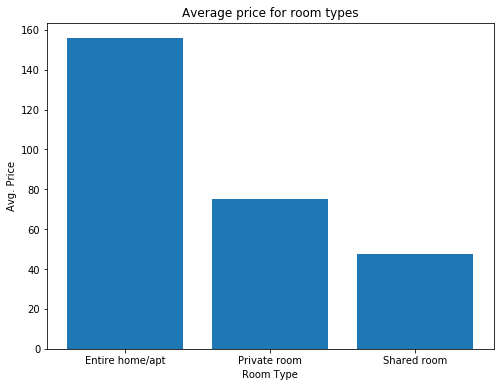

In [1483]:
# Check the average price for all room types
room_price = lis.groupby('room_type')['price'].mean().sort_values(ascending = False)

# Plot the average price for all room types
plt.figure(figsize=[8,6]);
plt.bar(room_price.index, room_price);
plt.xlabel('Room Type');
plt.ylabel('Avg. Price');
plt.title('Average price for room types');

##### Which areas / zips are more expensive?

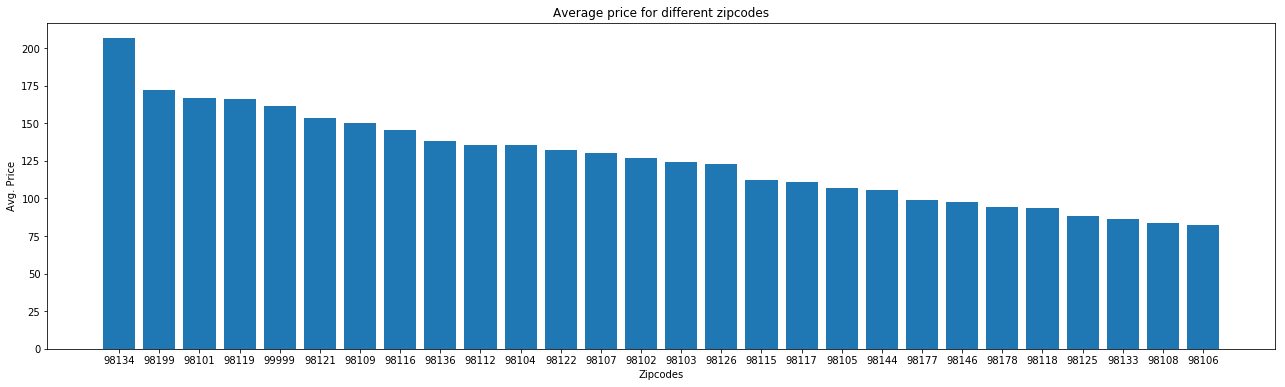

In [1007]:
# Check the average price for all zipcodes
zip_price = lis.groupby('zipcode')['price'].mean().sort_values(ascending = False)

# Plot the average price for all zipcodes
plt.figure(figsize=[22,6]);
plt.bar(zip_price.index, zip_price);
plt.xlabel('Zipcodes');
plt.ylabel('Avg. Price');
plt.title('Average price for different zipcodes');

In [1463]:
# Top 5 zipcodes based on avg house price
zip_price = pd.DataFrame(zip_price).reset_index()
top5_zip = zip_price.zipcode.head()

In [1466]:
# Number of houses in the top 5 expensive zipcodes
len(lis[lis['zipcode'].isin(top5_zip.values)])

422

In [1469]:
# Here are the neighbourhood based on the top 5 expensive zipcodes
top_neighbourhood = lis[lis['zipcode'].isin(top5_zip.values)]['host_neighbourhood']
top_neighbourhood.value_counts()

Queen Anne                   103
Central Business District    57 
Belltown                     54 
Magnolia                     51 
First Hill                   43 
Lower Queen Anne             25 
Pike Place Market            22 
Anaheim                      6  
Capitol Hill                 4  
Interbay                     4  
Industrial District          3  
Pioneer Square               2  
Hollywood                    2  
Madison Park                 2  
Fenway/Kenmore               2  
Ballard                      1  
Leschi                       1  
Downtown Toronto             1  
Portage Bay                  1  
Huntington Beach             1  
Northwest District           1  
Waianae Coast                1  
International District       1  
Name: host_neighbourhood, dtype: int64

In [1476]:
# Filtering the top 5 neighbourhood areas
top5_neighbourhood = top_neighbourhood.value_counts().head()
top5_neighbourhood

Queen Anne                   103
Central Business District    57 
Belltown                     54 
Magnolia                     51 
First Hill                   43 
Name: host_neighbourhood, dtype: int64

#### Out of 422 houses in the top 5 zipcodes, 25% are in 'Queen Anne' and ~50% of the houses are in 'Central Business District', 'Belltown', and 'Magnolia'. Looking into the neoghbourhood overview of these areas tells us that these areas are beautiful, and quiet street with ease of parking. These areas are also walkable to coffee, restuarents, groceries, nigh out, beautiful views and much more. 
#### As a future scope, further text analyses using nlp can be done to understand more about these neighbourhood areas.

In [1480]:
# Checking the neighbourhood overview for the top5_neighbourhoods
listings[listings['host_neighbourhood'].isin(top5_neighbourhood.index)]['neighborhood_overview']

0       NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

#### A high correlation of +0.7 is seen between number of amenities provided and the number of reviews received by that house. Agreeing that more amenities might not imply causation of high price, we are just highlighting the high correlation between the two.

In [1009]:
(lis.num_of_amenities).corr(lis.reviews_per_month)

0.07413663811663446

##### Taking a step further from univariate analyses to overall features that drive house pricing?

In [1498]:
# Define the features and target variable
X = lis[['host_response_rate','host_acceptance_rate','host_is_superhost','host_listings_count', \
         'host_has_profile_pic', 'host_identity_verified','latitude','longitude','is_location_exact','accommodates', 'bathrooms',\
         'bedrooms','beds','cleaning_fee','guests_included','extra_people_price','minimum_nights','maximum_nights',\
         'has_availability','number_of_reviews','review_scores_rating','review_scores_accuracy',\
         'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',\
         'review_scores_value','instant_bookable','require_guest_profile_picture',\
         'require_guest_phone_verification','reviews_per_month','security_deposit_Y/N', 'host_active_years', \
         'num_of_amenities', 'num_of_verifications','host_response_time_within a day', \
         'host_response_time_within a few hours','host_response_time_within an hour',\
         'property_type_Bed & Breakfast','property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin',\
         'property_type_Camper/RV', 'property_type_Chalet','property_type_Condominium', 'property_type_Dorm', \
         'property_type_House', 'property_type_Loft', 'property_type_Other','property_type_Tent', \
         'property_type_Townhouse','property_type_Treehouse', 'property_type_Yurt','room_type_Private room', \
         'room_type_Shared room', 'bed_type_Couch','bed_type_Futon', 'bed_type_Pull-out Sofa', \
         'bed_type_Real Bed','cancellation_policy_moderate', 'cancellation_policy_strict']]
y = lis['price']


In [1499]:
# Split data into train and test ßset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1500]:
# Use SelectKBest to identify the top 20 features driving the price
# Use mutual_info_regression as the score_func since we have a mix of categorical and continuoue variables and \
# our target variable is continuous
score_func = partial(mutual_info_regression)
select = SelectKBest(score_func, k=20)
feature_train_transformed = select.fit_transform(X_train,y_train)
feature_test_transformed = select.fit_transform(X_test,y_test)

In [1501]:
# Update the dataframe based on the new feature list
cols = select.get_support(indices=True)
X_train_new = X_train.iloc[:,cols]
X_test_new = X_test.iloc[:,cols]

In [1502]:
# Get the raw score for each feature, we use '-' to sort the array in descending order
scores = -np.sort(-select.scores_)
top20_scores = scores[:20]

In [1503]:
# The top 20 features list
predictors = list(X_train_new.columns)

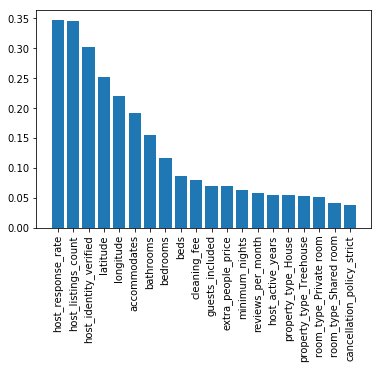

In [1504]:
# Plot the scores for the top 20 features to visualize the impact of these features on price
plt.bar(range(len(predictors)), top20_scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

#### We see that the airbnb price has mostly been impacted by:
- Number of listings the hosts has,
- Area of the house (we alreasy saw above analysing the zipcodes and neighbourhood)
- How many people does it accommodates and the number of baths/ beds available
- Extra fees for cleaning and extra guest
- Minimum and maximum nights the person book the house for
- Number of reviews it has received 
- Number of years host has been active for
- If he is a verified host
- Type of property and room (we saw earlier how boats and entire house/apt are most expensive)

#### Out of all the features, 2 most important ones that drives the price are number of listings the host has and the area of the house. The analyses earlier gives us the exact neighbourhood that are most expensive, 'Queen Anne' toping the ist. Furthermore, we also saw that boats have the highest average price when compared to other property types. It is then followed by condominiums, loft, house etc. As expected, booking an entire house/apt is almost double (2X) the average price of private rooms and 3.5X the shared rooms.

#### Now that we know the most important features, we are applying a regression model to predict the house prices

In [1505]:
# Validate the size of our new train and test data sets 
X_train_new.shape, X_test_new.shape

((2671, 20), (1145, 20))

In [1506]:
# Instantiate the model and normalizing the data
lm_model = LinearRegression(normalize=True)
# Fit the model to the train data set
lm_model.fit(X_train_new, y_train)
# Predict using test data set
y_pred = lm_model.predict(X_test_new)
# Check the score for y_test
r2_score(y_test, y_pred)

0.5824395626462494

In [1495]:
# Check on training data set for model overfit
# Predict using train data set
train_pred = lm_model.predict(X_train_new)
# Check the score
r2_score(y_train, train_pred)

0.533335916336083

#### R square on test data set is 0.58 which is a decent score although we could consider improving the accuracy by applying cross validation and or adding / removing features. 
#### We also checked our model for overfitting and can confirm it is not by the r-square score. Notice how the r square score for training data is less than the r-square for test data which confirms that our model is not overfitting.

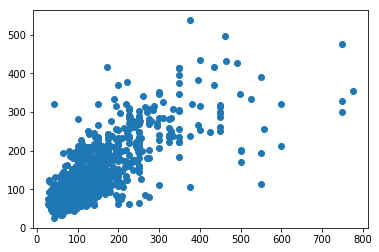

In [1496]:
# Looking at the trend to compare the predicted price with the actual price in the test data set
plt.scatter(y_test, y_pred);

## Conclusion

- From the analyses on the Seattle Airbnb data, we found out that people love to visit this as a toursity spot because of its natural beauty. Averag price of the house varies from 120 - 125 a night depending upon a lot of factors with time of the year being one of the key drivers. 
- We noticed July - August to be the most busiest months of the year and also most expensive ones based on the average monthly price being as high as 150 a night. November to April seems to be a slow season with November, December being the slowest with a lot of houses being available to  book for the entire month. Good weather in Seattle in the month of July-August along with the July holidays also are potential reason for these monthe being the busiest.
- A pattern is seem with hosts dropping the house prices potentially offering discounts, or promotions to attract more bookings in the slow months. This is noticed especially in the month of December, January and somewhat in March, April where following a slow month with no bookings, low prices resulted in a relative increase of the bookings. Post April, the price increases continuously until August / early September after which it starts to decline again.
- From our analyses, we also were able to identify the most expensive zipcodes and neighbourhoods, 'Queen Anne' to be on top thst is closely being followed by areas like 'Central Business District', 'Belltown', and 'Magnolia'. Something to notice was the easy transit, better reach to areas of necessasities, and things to do in a area were a few reasons explaining the high prices in these areas.
- Few ther things driving and also impacted the house were the trustworthyness and reputation of the hosts, bed ad bath available along with other amenities available and extra fees associated with the host. Type of property and room also played a significant role in defining the house price.

## References

https://stackoverflow.com/questions/35530640/pandas-use-value-if-not-null-else-use-value-from-next-column

https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work

https://stackoverflow.com/questions/41571591/count-the-number-of-elements-in-a-string-separated-by-comma

https://www.quora.com/How-do-I-get-the-current-year-as-an-int-value-in-Python

https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work

https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le

https://stats.stackexchange.com/questions/421912/selectkbest-score-function-with-mixed-categorical-and-continuous-data

https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order